recreating figure 3.2: gridworld state-value function
equiprobable random policy with gamma = 0.9


generating figure 3.2 visualization: 


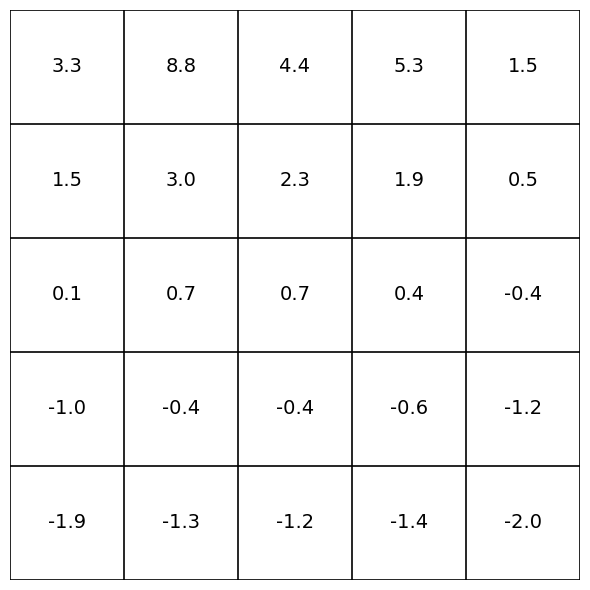

In [6]:
# Niveen Abdul-Mohsen (bvn9ad)
# Reinforcement Learning (CS 4771) - Gridword Example
# Exceptional Reward dynamics 
# i used numpy for numerical operations and matplotlib for plotting


import numpy as np
import matplotlib.pyplot as plt

# ============================================================================
# environment setup
# ============================================================================

class SimplifiedGridworldEnvironment:
    """
    gridworld environment from sutton & barto (chapter 3)
    has 2 special transition states with unique reward dynamics
    """
    
    def __init__(self, world_size=5):
        """initialize the 5x5 gridworld with the special state transitions"""
        self.world_size = world_size
        
        # special state coordinates: a transitions to a_prime, b to b_prime
        self.special_location_a = (0, 1)
        self.special_exit_a = (4, 1)
        self.special_reward_a = 10
        
        self.special_location_b = (0, 3)
        self.special_exit_b = (2, 3)
        self.special_reward_b = 5
        
        # all psossible movement directions
        self.movement_directions = {
            'north': (-1, 0),
            'south': (1, 0),
            'east': (0, 1),
            'west': (0, -1)
        }
        self.available_actions = list(self.movement_directions.keys())
        self.total_actions = len(self.available_actions)
    
    def compute_transition(self, current_row, current_col, chosen_action):
        # handles special state a transition
        if (current_row, current_col) == self.special_location_a:
            return (self.special_exit_a[0], 
                    self.special_exit_a[1], 
                    self.special_reward_a)
        
        # handle special state b transition
        if (current_row, current_col) == self.special_location_b:
            return (self.special_exit_b[0], 
                    self.special_exit_b[1], 
                    self.special_reward_b)
        
        # compute standard grid movement
        row_change, col_change = self.movement_directions[chosen_action]
        resulting_row = current_row + row_change
        resulting_col = current_col + col_change
        
        # check if movement attempts to leave grid boundaries
        if (resulting_row < 0 or resulting_row >= self.world_size or 
            resulting_col < 0 or resulting_col >= self.world_size):
            # agent remains in current position with penalty
            resulting_row = current_row
            resulting_col = current_col
            immediate_reward = -1
        else:
            # vald movement within grid
            immediate_reward = 0
        
        return resulting_row, resulting_col, immediate_reward

# ============================================================================
# value function computation
# ============================================================================

class ValueFunctionCalculator:
    
    def __init__(self, grid_environment, gamma=0.9):
        self.grid_world = grid_environment
        self.gamma = gamma
        self.convergence_tolerance = 1e-4
    
    def perform_policy_evaluation(self, action_probabilities, max_sweeps=1000):
        # initialize all state values to zero
        state_value_estimates = np.zeros((self.grid_world.world_size, self.grid_world.world_size))
        
        for sweep_number in range(max_sweeps):
            largest_value_update = 0
            updated_value_estimates = np.zeros_like(state_value_estimates)
            
            # value update for each state in the grid
            for row_index in range(self.grid_world.world_size):
                for col_index in range(self.grid_world.world_size):
                    expected_state_value = 0
                    
                    # sum over all possible actions
                    for action_choice in self.grid_world.available_actions:
                        probability_of_action = action_probabilities[(row_index, col_index)][action_choice]
                        next_row, next_col, step_reward = \
                            self.grid_world.compute_transition(row_index, col_index, action_choice)
                        
                        # apply bellman expectation equation: v(s) = sum[π(a|s) * [r + γ*v(s')]]
                        expected_state_value += probability_of_action * (
                            step_reward + 
                            self.gamma * state_value_estimates[next_row, next_col]
                        )
                    
                    updated_value_estimates[row_index, col_index] = expected_state_value
                    largest_value_update = max(
                        largest_value_update, 
                        abs(updated_value_estimates[row_index, col_index] - state_value_estimates[row_index, col_index])
                    )
            
            state_value_estimates = updated_value_estimates
            
            # check if values have converged (comment out print when sumbitting)
            if largest_value_update < self.convergence_tolerance:
                #print(f"convergence achieved after {sweep_number + 1} sweeps")
                break
        
        return state_value_estimates

# ============================================================================
# policy construction
# ============================================================================

def construct_random_equiprobable_policy(grid_environment): #create equiprobable random policy where action has prob 0.25
    constructed_policy = {}
    equal_probability = 1.0 / grid_environment.total_actions
    
    for row_position in range(grid_environment.world_size):
        for col_position in range(grid_environment.world_size):
            constructed_policy[(row_position, col_position)] = {
                action_name: equal_probability 
                for action_name in grid_environment.available_actions
            }
    
    return constructed_policy

# ============================================================================
# visualization
# ============================================================================

def create_value_function_visualization(computed_values, grid_environment):
    visualization_figure, plot_axes = plt.subplots(figsize=(6, 6))
    
    # draw horz and vert grid lins
    for horizontal_line in range(grid_environment.world_size + 1):
        plot_axes.axhline(y=horizontal_line, color='black', linewidth=1.2)
    for vertical_line in range(grid_environment.world_size + 1):
        plot_axes.axvline(x=vertical_line, color='black', linewidth=1.2)
    
    # add state, val numbers to each grid cell
    for row_position in range(grid_environment.world_size):
        for col_position in range(grid_environment.world_size):
            cell_value = computed_values[row_position, col_position]
            
            # format vals to one decimal place
            formatted_value = f"{cell_value:.1f}"
            
            # place text in center of cell (need to flip y-coordinate so row 0 is at top)
            plot_axes.text(col_position + 0.5, grid_environment.world_size - row_position - 0.5, 
                   formatted_value,
                   ha='center', va='center', 
                   fontsize=14, fontweight='normal')
    
    # trying to match the txtbook style
    plot_axes.set_xlim(0, grid_environment.world_size)
    plot_axes.set_ylim(0, grid_environment.world_size)
    plot_axes.set_aspect('equal')
    plot_axes.axis('off')
    
    plt.tight_layout()
    return visualization_figure

# ============================================================================
# main
# ============================================================================

if __name__ == "__main__":
    print("=" * 70)
    print("recreating figure 3.2: gridworld state-value function")
    print("equiprobable random policy with gamma = 0.9")
    print("=" * 70)
    print()
    
    # create the gridworld environment
    created_gridworld = SimplifiedGridworldEnvironment(world_size=5)
    
    # create equiprobable random policy
    equiprobable_policy = construct_random_equiprobable_policy(created_gridworld)
    
    # perform iterative policy evaluation
    value_calculator = ValueFunctionCalculator(created_gridworld, gamma=0.9)
    final_state_values = value_calculator.perform_policy_evaluation(equiprobable_policy)
    print()
    
    # display numerical results (comment out when submitting, debugging only)
    #print("computed state-value function v_π:")
    #print("-" * 35)
    #for display_row in range(created_gridworld.world_size):
    #    row_values_string = " ".join([f"{final_state_values[display_row, display_col]:5.1f}" 
    #                       for display_col in range(created_gridworld.world_size)])
    #    print(row_values_string)
    #print()
    
    # create figure figure 3.2
    print("generating figure 3.2 visualization: ")
    result_figure = create_value_function_visualization(final_state_values, created_gridworld)
    
    plt.savefig('figure_3_2_state_values.png', dpi=150, 
                bbox_inches='tight', facecolor='white')
    plt.show()
        
    




